___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

In this chapter, you will use a **second dataset** to explore the impact of **weather conditions** on police behavior during traffic stops. You will practice **merging** and **reshaping** datasets, assessing whether a data source is trustworthy, working with **categorical** data, and other advanced skills.

## Plotting the temperature

**INSTRUCTIONS**

*   Read ``weather.csv`` into a ``DataFrame`` named ``weather``.
*   Select the temperature columns (``TMIN``, ``TAVG``, ``TMAX``) and print their ``summary statistics`` using the ``.describe()`` method.
*   Create a **box plot** to visualize the temperature columns.
*   Display the plot.

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

In [3]:
# Read weather.csv into a DataFrame named weather.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr
weather = pd.read_csv("weather.csv")

In [4]:
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
weather.shape

(8022, 26)

In [6]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8022 entries, 0 to 8021
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  8022 non-null   object 
 1   DATE     8022 non-null   object 
 2   AWND     4017 non-null   float64
 3   TAVG     1217 non-null   float64
 4   TMAX     8005 non-null   float64
 5   TMIN     7996 non-null   float64
 6   WT01     1777 non-null   float64
 7   WT02     221 non-null    float64
 8   WT03     227 non-null    float64
 9   WT04     119 non-null    float64
 10  WT05     360 non-null    float64
 11  WT06     25 non-null     float64
 12  WT07     79 non-null     float64
 13  WT08     404 non-null    float64
 14  WT09     69 non-null     float64
 15  WT10     2 non-null      float64
 16  WT11     3 non-null      float64
 17  WT13     1175 non-null   float64
 18  WT14     575 non-null    float64
 19  WT15     6 non-null      float64
 20  WT16     1326 non-null   float64
 21  WT17     12 no

In [7]:
# Select the temperature columns (TMIN, TAVG, TMAX) and print their summary statistics using the .describe() method.
weather[["TMIN", "TAVG", "TMAX"]].describe()

,TMIN,TAVG,TMAX
count,7996.000000,1217.000000,8005.000000
mean,42.099425,52.493016,61.247096
std,17.386667,17.829792,18.495043
min,-10.000000,6.000000,13.000000
25%,29.000000,39.000000,46.000000
50%,42.000000,54.000000,62.000000
75%,57.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


In [15]:
# Create a box plot to visualize the temperature columns.
# Display the plot.

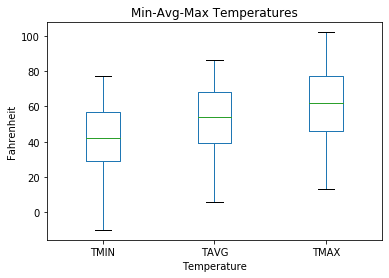

In [55]:
weather[["TMIN", "TAVG", "TMAX"]].plot(kind = "box")
plt.xlabel("Temperature")
plt.ylabel("Fahrenheit")
plt.title("Min-Avg-Max Temperatures")
plt.show()

***

## Plotting the temperature difference

**INSTRUCTIONS**

*   Create a new column in the ``weather`` ``DataFrame`` named ``TDIFF`` that represents the difference between the maximum and minimum temperatures.
*   Print the summary statistics for ``TDIFF`` using the ``.describe()`` method.
*   Create a histogram with ``20 bins`` to visualize ``TDIFF``.
*   Display the plot.

In [8]:
# Create a new column in the ``weather`` ``DataFrame`` named ``TDIFF`` that represents the difference between the maximum and minimum temperatures.
weather["TDIFF"] = weather["TMAX"] - weather["TMIN"]

In [9]:
# Print the summary statistics for TDIFF using the .describe() method.

weather["TDIFF"].describe()

count    7994.000000
mean       19.149237
std         7.009716
min       -25.000000
25%        14.000000
50%        19.000000
75%        24.000000
max        48.000000
Name: TDIFF, dtype: float64

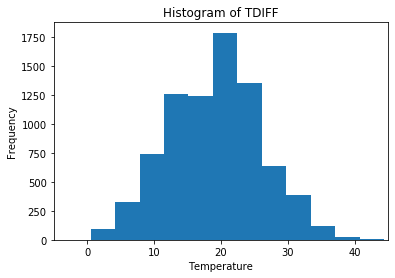

In [12]:
# Create a histogram with 20 bins to visualize TDIFF.
# Display the plot.
weather.TDIFF.plot(kind = "hist", bins = 20)
plt.xlim(-5,45)
plt.xlabel("Temperature")
#plt.ylabel("Num_of_Values")
plt.title("Histogram of TDIFF");


***

## Counting bad weather conditions

The ``weather`` ``DataFrame`` contains ``20`` columns that start with ``'WT'``, each of which represents a bad weather condition. For example:

*   ``WT05`` indicates ``"Hail"``
*   ``WT11`` indicates ``"High or damaging winds"``
*   ``WT17`` indicates ``"Freezing rain"``

For every row in the dataset, each ``WT`` column contains either a ``1`` (meaning the condition was present that day) or ``NaN`` (meaning the condition was not present).

In this exercise, you'll quantify ``"how bad"`` the weather was each day by counting the number of ``1`` values in each row.

**INSTRUCTIONS**

*   Copy the columns ``WT01`` through ``WT22`` from ``weather`` to a new ``DataFrame`` named ``WT``.
*   Calculate the sum of each row in ``WT``, and store the results in a new weather column named ``bad_conditions``.
*   Replace any ``missing values`` in ``bad_conditions`` with a ``0``. (This has been done for you.)
*   Create a **histogram** to visualize ``bad_conditions``, and then display the plot.

In [14]:
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0


In [15]:
# Copy the columns WT01 through WT22 from weather to a new DataFrame named WT.
WT = weather.loc[:, "WT01" : "WT22"]
WT.head()

,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Calculate the sum of each row in WT, and store the results in a new weather column named bad_conditions.
# Replace any missing values in bad_conditions with a 0. (This has been done for you.)
weather["bad_conditions"] = WT.sum(axis = "columns")
weather.bad_conditions.value_counts(dropna = False)


0.0    5738
1.0     628
4.0     476
3.0     380
2.0     368
5.0     282
6.0     101
7.0      41
8.0       4
9.0       4
Name: bad_conditions, dtype: int64

In [22]:
weather["bad_conditions"] = weather.bad_conditions.fillna(0).astype("int")

In [21]:
# Create a histogram to visualize bad_conditions, and then display the plot.

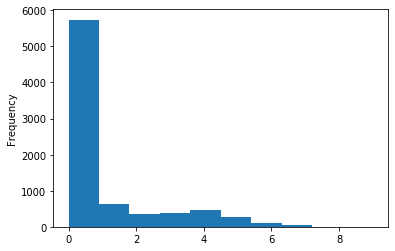

In [25]:
weather.bad_conditions.plot(kind = "hist")
plt.show()

In [26]:
weather.bad_conditions.value_counts(dropna = False)

0    5738
1     628
4     476
3     380
2     368
5     282
6     101
7      41
9       4
8       4
Name: bad_conditions, dtype: int64

***

## Rating the weather conditions

In the previous exercise, you counted the number of bad weather conditions each day. In this exercise, you'll use the counts to create a *rating system** for the weather.

The counts range from ``0`` to ``9``, and should be converted to ratings as follows:

*   Convert ``0`` to ``'good'``
*   Convert ``1`` through ``4`` to ``'bad'``
*   Convert ``5`` through ``9`` to ``'worse'``

**INSTRUCTIONS**

*   Count the **unique** values in the ``bad_conditions`` column and sort the ``index``. 
*   Create a ``dictionary`` called ``mapping`` that maps the ``bad_conditions`` integers to strings as specified above.
*   Convert the ``bad_conditions`` integers to strings using the ``mapping`` and store the results in a new column called ``rating``.
*   Count the **unique** values in ``rating`` to verify that the integers were properly converted to strings.

In [ ]:
# Count the unique values in the bad_conditions column and sort the index

In [34]:

weather.bad_conditions.value_counts(dropna=False).sort_index()

0    5738
1     628
2     368
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64

In [35]:
# Create a dictionary called mapping that maps the bad_conditions 
# integers to strings as specified above.

mapping = {0:'good',
           1:'bad', 2:'bad', 3:'bad', 4:'bad',
           5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}

In [38]:
# Convert the bad_conditions integers to strings using the mapping and store the results in a new column called rating.
weather["rating"]=weather.bad_conditions.apply(lambda x:mapping[x])

In [41]:
# Count the unique values in rating to verify that the integers were properly converted to strings.
weather.rating.value_counts(dropna=False)

good     5738
bad      1852
worse     432
Name: rating, dtype: int64

***

## Changing the data type to category

Since the ``rating`` column only has a few possible values, you'll change its data type to ``category`` in order to store the data more efficiently. You'll also specify a logical order for the categories, which will be useful for future exercises.

**INSTRUCTIONS**

*   Create a ``list`` object called ``cats`` that lists the weather ratings in a logical order: ``'good'``, ``'bad'``, ``'worse'``.
*   Change the data type of the ``rating`` column from ``object`` to ``category``. Make sure to use the ``cats list`` to define the category ordering.
*   Examine the ``head`` of the ``rating`` column to confirm that the categories are logically ordered.

In [43]:
# Create a list object called cats that lists the weather ratings in a logical order: 'good', 'bad', 'worse'.
type(weather.rating[0])

str

In [44]:
cats = ["good", "bad", "worse"]

In [51]:
# Change the data type of the rating column from object to category. Make sure to use the cats list to define the category ordering.
weather["rating"]=pd.Categorical(values=weather.rating, ordered=True, categories=cats)

In [54]:
# Examine the head of the rating column to confirm that the categories are logically ordered.
weather.rating

0       good
1       good
2       good
3       good
4       good
        ... 
8017     bad
8018    good
8019     bad
8020     bad
8021     bad
Name: rating, Length: 8022, dtype: category
Categories (3, object): [good < bad < worse]

In [55]:
weather.rating.min()

'good'

In [56]:
weather.rating.max()

'worse'

In [57]:
weather.rating.sort_values()

0        good
3832     good
3831     good
3830     good
3829     good
        ...  
4853    worse
4852    worse
4851    worse
4871    worse
4010    worse
Name: rating, Length: 8022, dtype: category
Categories (3, object): [good < bad < worse]

***

## Preparing the DataFrames

In this exercise, you'll prepare the **traffic stop** and **weather rating** ``DataFrames`` so that they're ready to be merged:

With the ``ri`` ``DataFrame``, you'll move the ``stop_datetime`` index to a ``column`` since the index will be lost during the merge.

With the ``weather`` ``DataFrame``, you'll select the ``DATE`` and ``rating`` columns and put them in a new ``DataFrame``.

**INSTRUCTIONS**

* Reset the ``index`` of the ``ri`` ``DataFrame``.

* Examine the ``head`` of ``ri`` to verify that ``stop_datetime`` is now a ``DataFrame`` column, 
and the ``index`` is now the default ``integer`` index.

* Create a new ``DataFrame`` named ``weather_rating`` that contains only the ``DATE`` and ``rating`` columns from the ``weather`` ``DataFrame``.

* Examine the ``head`` of ``weather_rating`` to verify that it contains the proper columns.

> Before starting your work from this part of this chapter **repeat the steps which you did in the first chapter for preparing the ``ri`` data.** Continue to this chapter based on where you were in the end of the first chapter.

In [60]:
import pandas as pd

# ri = pd.read_csv('RI_cleaned.csv', nrows=50000)
ri = pd.read_csv('RI_cleaned.csv')

drop_columns=["state", "county_name", "county_fips", "fine_grained_location"]
ri.drop(drop_columns, axis='columns', inplace=True)

ri.dropna(subset=['driver_gender'], inplace=True)

ri['is_arrested'] = ri.is_arrested.astype('bool')

combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)

In [69]:
ri.head(2)

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,stop_datetime
0,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55:00
1,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,...,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02 20:30:00


In [68]:
# Create a new DataFrame named weather_rating that contains only the DATE and rating columns from the weather DataFrame.
weather_rating=weather[["DATE","rating"]]
weather_rating.sample(5, random_state=101)

,DATE,rating
5168,2008-03-09,good
3101,2013-07-23,good
5036,2007-10-29,good
6238,2011-02-12,bad
1850,2010-02-08,good


In [70]:
# Examine the head of weather_rating to verify that it contains the proper columns.
weather_rating.head(2)

,DATE,rating
0,2005-01-01,good
1,2005-01-02,good


***

## Merging the DataFrames

Merging the DataFrames
In this exercise, you'll ``merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` into a new ``DataFrame``, ``ri_weather``.

The ``DataFrames`` will be joined using the ``stop_date`` column from ``ri`` and the ``DATE`` column from ``weather_rating``. Thankfully the date formatting matches exactly, which is not always the case!

Once the merge is complete, you'll set ``stop_datetime`` as the index, which is the column you saved in the previous exercise.

Examine the shape of the ``ri`` ``DataFrame``.
``Merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` using a ``left join``.
Examine the ``shape`` of ``ri_weather`` to confirm that it has two more columns but the same number of rows as ``ri``.
Replace the ``index`` of ``ri_weather`` with the ``stop_datetime`` column.

In [71]:
ri.stop_date.shape

(480584,)

In [72]:
weather_rating.DATE.shape

(8022,)

In [73]:
ri.stop_date[0]

'2005-01-02'

In [74]:
weather_rating.DATE[0]

'2005-01-01'

In [75]:
ri_weather=pd.merge(left=ri, right=weather_rating, left_on="stop_date", right_on="DATE", how="left")

In [80]:
ri_weather.shape

(959952, 25)

In [81]:
ri_weather.head(2)

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,stop_datetime,DATE,rating
0,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55:00,2005-01-02,good
1,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55:00,2005-01-02,bad


***

## Comparing arrest rates by weather rating

Do police officers arrest drivers more often when the weather is bad? Find out below!

- **First**, you'll calculate the **overall arrest rate**.

- **Then**, you'll calculate the **arrest rate** for each of the **weather ratings** you previously assigned.

- **Finally**, you'll add **violation type** as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.

Since you previously defined a logical order for the weather categories, ``good < bad < worse``, they will be sorted that way in the results.

In [88]:

ri_weather.isnull().sum()

id                         0
stop_date                  0
stop_time                  0
location_raw               0
police_department          0
driver_gender              0
driver_age_raw             2
driver_age              3275
driver_race_raw            0
driver_race                0
violation_raw              0
violation                  0
search_conducted           0
search_type_raw       924468
search_type           924468
contraband_found           0
stop_outcome               0
is_arrested                0
stop_duration              0
out_of_state            1615
drugs_related_stop         0
district                   0
stop_datetime              0
DATE                       0
rating                     0
dtype: int64

In [89]:
# First, you'll calculate the overall arrest rate.
ri_weather.is_arrested.mean()*100

3.4571520242678804

In [92]:
# Then, you'll calculate the arrest rate for each of the weather ratings you previously assigned.
ri_weather.groupby("rating").is_arrested.mean()*100

rating
good     3.408004
bad      3.522555
worse    3.935957
Name: is_arrested, dtype: float64

In [94]:
# Finally, you'll add violation type as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.
ri_weather.violation.value_counts()

Speeding               536579
Moving violation       180234
Equipment              122454
Other                   48388
Registration/plates     39664
Seat belt               32633
Name: violation, dtype: int64

In [96]:
ri_weather.groupby(["rating","violation"]).is_arrested.mean()*100


rating  violation          
good    Equipment              0.059125
        Moving violation       0.056805
        Other                  0.080682
        Registration/plates    0.083238
        Seat belt              0.026339
        Speeding               0.013494
bad     Equipment              0.059581
        Moving violation       0.058081
        Other                  0.084950
        Registration/plates    0.092634
        Seat belt              0.028795
        Speeding               0.013348
worse   Equipment              0.094373
        Moving violation       0.062249
        Other                  0.058704
        Registration/plates    0.098673
        Seat belt              0.000000
        Speeding               0.016600
Name: is_arrested, dtype: float64

***

## Selecting From a mult-indexed Series

The output of a single ``.groupby()`` operation on multiple columns is a ``Series`` with a ``MultiIndex``. Working with this type of object is similar to working with a ``DataFrame``:

The ``outer`` index level is like the ``DataFrame`` rows.
The ``inner`` index level is like the ``DataFrame`` columns.
In this exercise, you'll practice accessing data from a multi-indexed ``Series`` using the ``.loc[]`` accessor.

**INSTRUCTIONS**

- Save the output of the ``.groupby()`` operation from the last exercise as a new object, ``arrest_rate``.
- Print the ``arrest_rate`` ``Series`` and examine it.
- Print the arrest rate for ``moving violations`` in bad weather.
- Print the arrest rates for ``speeding violations`` in all three weather conditions.

In [107]:
# Save the output of the .groupby() operation from the last exercise as a new object, arrest_rate.
arrest_rate=ri_weather.groupby(["rating","violation"]).is_arrested.mean()*100

In [108]:
# Print the arrest_rate Series and examine it.
print(arrest_rate)

rating  violation          
good    Equipment              5.912525
        Moving violation       5.680502
        Other                  8.068152
        Registration/plates    8.323823
        Seat belt              2.633866
        Speeding               1.349389
bad     Equipment              5.958070
        Moving violation       5.808147
        Other                  8.495033
        Registration/plates    9.263368
        Seat belt              2.879453
        Speeding               1.334787
worse   Equipment              9.437340
        Moving violation       6.224900
        Other                  5.870445
        Registration/plates    9.867282
        Seat belt              0.000000
        Speeding               1.659968
Name: is_arrested, dtype: float64


In [106]:
# Print the arrest rate for moving violations in bad weather.
arrest_rate.loc["bad","Moving violation"]

5.80814717477004

In [105]:
# Print the arrest rates for speeding violations in all three weather conditions.
arrest_rate.loc[:,"Speeding"]

rating
good     1.349389
bad      1.334787
worse    1.659968
Name: is_arrested, dtype: float64

***

## Reshaping the arrest rate data

In this exercise, you'll start by **reshaping** the ``arrest_rate`` ``Series`` into a ``DataFrame``. This is a useful step when working with any multi-indexed ``Series``, since it enables you to access the full range of ``DataFrame`` methods.

Then, you'll create the exact same ``DataFrame`` using a ``pivot table``. This is a great example of how pandas often gives you more than one way to reach the same result!

**INSTRUCTIONS**

- ``unstack`` the ``arrest_rate`` ``Series`` to ``reshape`` it into a ``DataFrame``.
- Create the exact same ``DataFrame`` using a ``pivot table``! Each of the three ``.pivot_table()`` parameters should be specified as one of the ``ri_weather`` columns.

In [111]:
ri_weather.head(2)

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,stop_datetime,DATE,rating
0,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55:00,2005-01-02,good
1,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55:00,2005-01-02,bad


In [125]:
ri_weather.groupby(["violation","rating"]).id.count().unstack()

rating,good,bad,worse
violation,,,
Equipment,89877,28667,3910
Moving violation,130411,41855,7968
Other,34159,10771,3458
Registration/plates,28917,9014,1733
Seat belt,26463,6147,23
Speeding,389732,121967,24880
